<a href="https://colab.research.google.com/github/ArthurTerozendi/classificador-pefil-voto-candidato/blob/main/classificador_pefil_voto_candidato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de Perfil de Voto

### Clonando repositório

In [1]:
!git clone https://github.com/ArthurTerozendi/classificador-pefil-voto-candidato.git

Cloning into 'classificador-pefil-voto-candidato'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 46 (delta 7), reused 0 (delta 0), pack-reused 31
Unpacking objects: 100% (46/46), 69.82 MiB | 8.62 MiB/s, done.


### Imports

In [2]:
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [3]:
def calculate_age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

### Criando Dataframes

In [4]:
bem_candidatos = pd.read_csv('classificador-pefil-voto-candidato/database/bem_candidato_2022_MG.csv', ',', encoding='latin1', usecols=['SQ_CANDIDATO', 'VR_BEM_CANDIDATO'])
consulta_cand = pd.read_csv('classificador-pefil-voto-candidato/database/consulta_cand_2022_MG.csv', ',', encoding='latin1', usecols=['DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'DT_NASCIMENTO', 'DS_GENERO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA'])

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
print(len(bem_candidatos), len(consulta_cand))

8548 2562


### Tratamento do valor dos bens de cada canditado

- Somatório do valor dos bens

In [6]:
bem_candidatos['VR_BEM_CANDIDATO'] = bem_candidatos['VR_BEM_CANDIDATO'].apply(lambda x: x.replace(',', '.'))
bem_candidatos['VR_BEM_CANDIDATO'] = pd.to_numeric(bem_candidatos['VR_BEM_CANDIDATO'], downcast='float')
bem_candidatos_sum = bem_candidatos.groupby(['SQ_CANDIDATO']).sum()
bem_candidatos_sum

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
130001595976,2.195987e+07
130001595978,5.700000e+05
130001595979,3.332248e+05
130001595983,9.090000e+05
130001595984,2.073415e+06
...,...
130001737057,5.000000e+05
130001737059,1.500000e+04
130001737060,1.360000e+04


- Pegando apenas os Deputados

In [7]:
dEstadual = consulta_cand.query("DS_CARGO == 'DEPUTADO ESTADUAL'", inplace=False)
dFederal = consulta_cand.query("DS_CARGO == 'DEPUTADO FEDERAL'", inplace=False)
deputados = pd.concat([dEstadual, dFederal])
deputados

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA
3,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA
5,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA
6,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA
9,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA
13,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA
...,...,...,...,...,...,...,...,...
2549,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA
2551,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA
2552,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA
2553,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA


- Junção das duas tabelas

In [8]:
registroCand = pd.merge(deputados, bem_candidatos_sum, how='left', left_on='SQ_CANDIDATO', right_on='SQ_CANDIDATO')
registroCand['IDADE'] = registroCand['DT_NASCIMENTO'].apply(calculate_age)
registroCand

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,VR_BEM_CANDIDATO,IDADE
0,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,3.490000e+04,39
1,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,2.200000e+04,50
2,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,6.800000e+05,26
3,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,NaN,61
4,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,1.592013e+05,58
...,...,...,...,...,...,...,...,...,...,...
2509,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,NaN,41
2510,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,NaN,56
2511,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,4.500000e+04,42
2512,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,2.537668e+06,52


- Definindo faixas de valor de bens

In [9]:
registroCand["N_Declarou"] = registroCand['VR_BEM_CANDIDATO'].isnull().values
registroCand["N_Declarou"] = np.where(registroCand['N_Declarou'], 1, 0)
registroCand["Menor10K"] = np.where(registroCand['VR_BEM_CANDIDATO'] <= 10000, 1, 0)
registroCand["10kA100K"] = np.where((registroCand['VR_BEM_CANDIDATO'] > 10000) & (registroCand["VR_BEM_CANDIDATO"] <= 100000), 1, 0)
registroCand["100kA1000K"] = np.where((registroCand['VR_BEM_CANDIDATO'] >= 100000) & (registroCand["VR_BEM_CANDIDATO"] <= 1000000), 1, 0)
registroCand["Maior10000K"] = np.where(registroCand['VR_BEM_CANDIDATO'] >= 1000000, 1, 0)

In [10]:
registroCand 

,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,DT_NASCIMENTO,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,VR_BEM_CANDIDATO,IDADE,N_Declarou,Menor10K,10kA100K,100kA1000K,Maior10000K
0,DEPUTADO ESTADUAL,130001607719,44357,JARDEL MOIA MONTEIRO,24/01/1984,MASCULINO,CASADO(A),PARDA,3.490000e+04,39,0,0,1,0,0
1,DEPUTADO ESTADUAL,130001615626,11323,REINALDO LUCIO DA SILVA,30/08/1972,MASCULINO,CASADO(A),PARDA,2.200000e+04,50,0,0,1,0,0
2,DEPUTADO ESTADUAL,130001634278,19151,ELIES GOMES COSTA,23/02/1997,MASCULINO,CASADO(A),PARDA,6.800000e+05,26,0,0,0,1,0
3,DEPUTADO ESTADUAL,130001669318,35888,JOSE GONZAGA DE SOUZA,19/05/1961,MASCULINO,CASADO(A),PRETA,NaN,61,1,0,0,0,0
4,DEPUTADO ESTADUAL,130001607418,43456,SILVIA DA CRUZ MESSIAS,13/08/1964,FEMININO,CASADO(A),BRANCA,1.592013e+05,58,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,DEPUTADO FEDERAL,130001607279,1360,DINEY LENON DE PAULO,16/06/1981,MASCULINO,SOLTEIRO(A),BRANCA,NaN,41,1,0,0,0,0
2510,DEPUTADO FEDERAL,130001606187,3377,ANGELITA MOREIRA ROCHA,20/09/1966,FEMININO,SOLTEIRO(A),BRANCA,NaN,56,1,0,0,0,0
2511,DEPUTADO FEDERAL,130001606191,3337,ERICK SANTOS NAZARETH,20/12/1980,MASCULINO,CASADO(A),PARDA,4.500000e+04,42,0,0,1,0,0
2512,DEPUTADO FEDERAL,130001607565,9034,RICARDO GONï¿½ALVES CAMPOS,13/11/1970,MASCULINO,CASADO(A),BRANCA,2.537668e+06,52,0,0,0,0,1


In [11]:
registroCand.drop(columns=["VR_BEM_CANDIDATO"], inplace=True)

### Análise exploratória da base

- Quantidade de Deputados Estaduais e Federais

([<matplotlib.patches.Wedge at 0x7f5651a96a90>,
 [Text(-0.631153739375505, 3.2390808815576553, 'DEPUTADO ESTADUAL'),
  Text(0.631153436110864, -3.239080940650519, 'DEPUTADO FEDERAL')],
 [Text(-0.3442656760230027, 1.766771389940539, '56.13'),
  Text(0.34426551060592575, -1.7667714221730102, '43.87')])

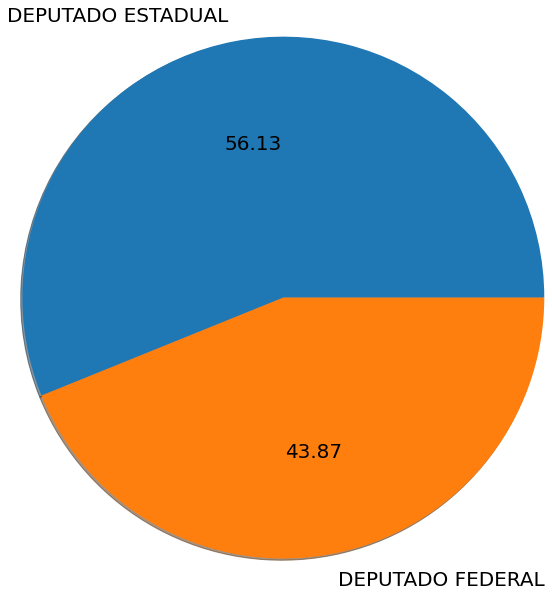

In [12]:
from numpy.lib.shape_base import tile
num_cargos = registroCand['DS_CARGO'].value_counts()
plt.pie(x=num_cargos, labels=['DEPUTADO ESTADUAL', 'DEPUTADO FEDERAL'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

- Quantidade de candidatos dos gêneros Masculino e Feminino

([<matplotlib.patches.Wedge at 0x7f56510b0940>,
 [Text(-1.6392743945497714, 2.864049486194937, 'MASCULINO'),
  Text(1.639274394549771, -2.8640494861949373, 'FEMININO')],
 [Text(-0.8941496697544206, 1.5622088106517835, '66.55'),
  Text(0.8941496697544203, -1.5622088106517837, '33.45')])

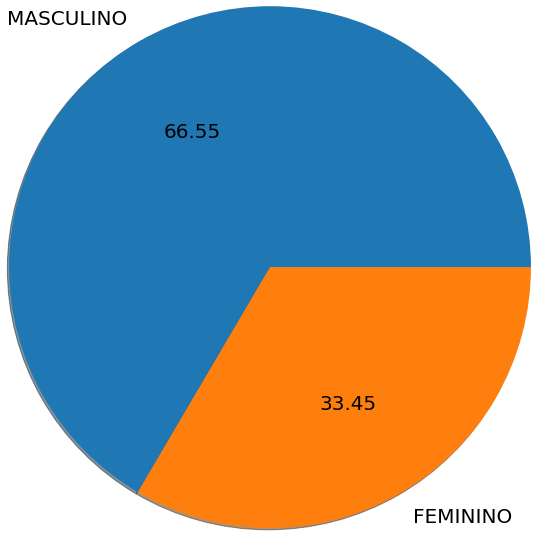

In [13]:
num_genero = registroCand['DS_GENERO'].value_counts()
plt.pie(x=num_genero, labels=['MASCULINO', 'FEMININO'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

- Quantidade de candidatos por Raça

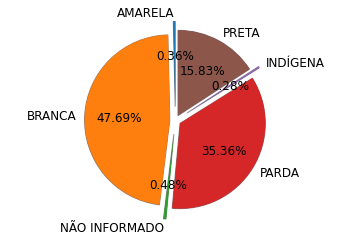

In [14]:
num_cor_raca = registroCand['DS_COR_RACA'].value_counts()
num_cor_raca_labels = ['AMARELA', 'BRANCA', 'NÃO INFORMADO', 'PARDA', 'INDÍGENA', 'PRETA']
num_cor_raca_value = [num_cor_raca.AMARELA, num_cor_raca.BRANCA, num_cor_raca['Nï¿½O INFORMADO'], num_cor_raca.PARDA, num_cor_raca['INDï¿½GENA'], num_cor_raca.PRETA]
f, ax = plt.subplots()
explode = (2, 0.8, 2, 0.8, 2, 0.8)
ax.pie(num_cor_raca_value, explode=explode, labels=num_cor_raca_labels, autopct='%.2f%%',
        shadow=True, startangle=90, radius=12.4, textprops={'size': 'larger'})
ax.axis('equal')
plt.show()

- Quantidade de candidatos por estado civíl

([<matplotlib.patches.Wedge at 0x7f5651146a30>,
 [Text(-0.35806516934099164, 3.280516626158875, 'CASADO(A)'),
  Text(-1.3188334975399036, -3.0250087943288144, 'SOLTEIRO(A)'),
  Text(2.6885355916439857, -1.91357685303296, 'DIVORCIADO(A)'),
  Text(3.2727022082881088, -0.4235802826692222, 'VIÚVO(A)'),
  Text(3.2985159749147486, -0.09895637034677872, 'SEPARADO(A) JUDICIALMENTE')],
 [Text(-0.19530827418599542, 1.7893727051775679, '53.46'),
  Text(-0.7193637259308564, -1.6500047969066256, '29.99'),
  Text(1.4664739590785374, -1.0437691925634325, '13.40'),
  Text(1.7851102954298772, -0.23104379054684843, '2.19'),
  Text(1.7991905317716805, -0.05397620200733384, '0.95')])

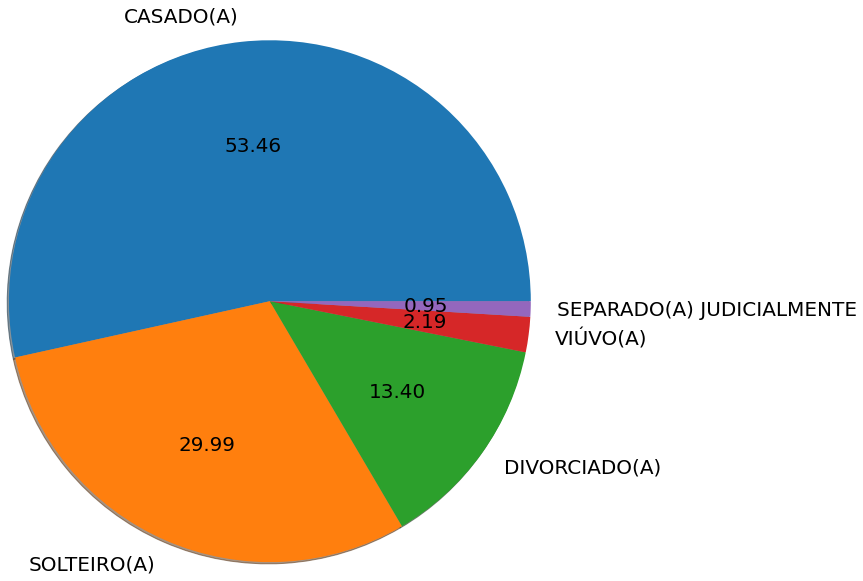

In [15]:
num_estado_civil = registroCand['DS_ESTADO_CIVIL'].value_counts()
plt.pie(x=num_estado_civil, labels=['CASADO(A)', 'SOLTEIRO(A)', 'DIVORCIADO(A)', 'VIÚVO(A)', 'SEPARADO(A) JUDICIALMENTE'], autopct='%.2f', shadow=True, radius=3, textprops={'fontsize': 20}, )

- Análise da faia etária dos candidatos

<AxesSubplot:>

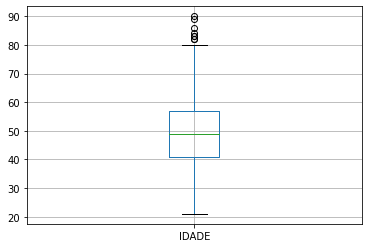

In [16]:
registroCand.boxplot('IDADE')

In [17]:
# registroCand.boxplot('VR_BEM_CANDIDATO', figsize=(12, 20))
# registroCand[['VR_BEM_CANDIDATO']].describe(include='all')

In [18]:
# registroCand.boxplot('VR_BEM_CANDIDATO', figsize=(12, 200))

In [19]:
# registroCand.to_csv('classificador-pefil-voto-candidato/database/registro_candidato.csv')

### Obtenção e tratamento da quantidade de votos de cada candidato

In [31]:
votacao_secao = pd.read_csv('classificador-pefil-voto-candidato/database/votacao_secao_2022_MG_compacta.zip', sep=';', compression='zip', usecols=['NM_MUNICIPIO', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'DS_CARGO'])
votacao_secao_dEstadual = votacao_secao.query("DS_CARGO == 'DEPUTADO ESTADUAL'", inplace=False)
votacao_secao_dFederal = votacao_secao.query("DS_CARGO == 'DEPUTADO FEDERAL'", inplace=False)
votacao_secao_deputados = pd.concat([votacao_secao_dEstadual, votacao_secao_dFederal])

In [32]:
voto_cidade = votacao_secao_deputados
# voto_cidade = vatocao_secao_deputados.groupby(['NM_MUNICIPIO', 'NR_VOTAVEL', 'NM_VOTAVEL', 'DS_CARGO']).sum()
# voto_cidade

In [33]:
voto_cidade = voto_cidade.query("NR_VOTAVEL > 97", inplace=False)
voto_cidade

,NM_MUNICIPIO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS
13,DIVINÓPOLIS,DEPUTADO ESTADUAL,13800,THYALLE KELLE ARAÚJO,3
26,DIVINÓPOLIS,DEPUTADO ESTADUAL,13800,THYALLE KELLE ARAÚJO,3
28,DIVINÓPOLIS,DEPUTADO ESTADUAL,13800,THYALLE KELLE ARAÚJO,3
39,DIVINÓPOLIS,DEPUTADO ESTADUAL,13800,THYALLE KELLE ARAÚJO,1
45,DIVINÓPOLIS,DEPUTADO ESTADUAL,13800,THYALLE KELLE ARAÚJO,1
...,...,...,...,...,...
1978741,BELO HORIZONTE,DEPUTADO FEDERAL,4400,ÁLVARO DAMIÃO VIEIRA DA PAZ,4
1978742,EXTREMA,DEPUTADO FEDERAL,4400,ÁLVARO DAMIÃO VIEIRA DA PAZ,2
1978743,BELO HORIZONTE,DEPUTADO FEDERAL,4400,ÁLVARO DAMIÃO VIEIRA DA PAZ,5
1978744,GOVERNADOR VALADARES,DEPUTADO FEDERAL,1315,JOÃO CARLOS SIQUEIRA,2


- Bases de votos por regiao

In [34]:
voto_cidade_cvertentes = voto_cidade.query("NM_MUNICIPIO == 'LAVRAS' or NM_MUNICIPIO == 'NEPOMUCENO' or NM_MUNICIPIO == 'RESSAQUINHA'", inplace=False)
voto_cidade_central = voto_cidade.query("NM_MUNICIPIO == 'CURVELO' or NM_MUNICIPIO == 'TRÊS MARIAS' or NM_MUNICIPIO == 'ESTRELA DO INDAIÁ'", inplace=False)
voto_cidade_jequitinhonha = voto_cidade.query("NM_MUNICIPIO == 'DIAMANTINA' or NM_MUNICIPIO == 'JEQUITINHONHA' or NM_MUNICIPIO == 'BANDEIRA'", inplace=False)
voto_cidade_metropolitana = voto_cidade.query("NM_MUNICIPIO == 'BELO HORIZONTE' or NM_MUNICIPIO == 'CAETÉ' or NM_MUNICIPIO == 'TAQUARAÇU'", inplace=False)
voto_cidade_noroeste = voto_cidade.query("NM_MUNICIPIO == 'PARACATU' or NM_MUNICIPIO == 'BURITIS' or NM_MUNICIPIO == 'DOM BOSCO'", inplace=False)
voto_cidade_norte = voto_cidade.query("NM_MUNICIPIO == 'MONTES CLAROS' or NM_MUNICIPIO == 'SALINAS' or NM_MUNICIPIO == 'SÃO JOÃO DA LAGOA'", inplace=False)
voto_cidade_oeste = voto_cidade.query("NM_MUNICIPIO == 'DIVINÓPOLIS' or NM_MUNICIPIO == 'PIUMHI' or NM_MUNICIPIO == 'SANTANA DO JACARÉ'", inplace=False)
voto_cidade_sul = voto_cidade.query("NM_MUNICIPIO == 'POÇOS DE CALDAS' or NM_MUNICIPIO == 'EXTREMA' or NM_MUNICIPIO == 'CLARAVAL'", inplace=False)
voto_cidade_triangulo = voto_cidade.query("NM_MUNICIPIO == 'UBERLÂNDIA' or NM_MUNICIPIO == 'SÃO GOTARDO' or NM_MUNICIPIO == 'UNIÃO DE MINAS'", inplace=False)
voto_cidade_vmucuri = voto_cidade.query("NM_MUNICIPIO == 'TEÓFILO OTONI' or NM_MUNICIPIO == 'ÁGUAS FORMOSAS' or NM_MUNICIPIO == 'BERTÓPOLIS'", inplace=False)
voto_cidade_rdoce = voto_cidade.query("NM_MUNICIPIO == 'GOVERNADOR VALADARES' or NM_MUNICIPIO == 'MUTUM' or NM_MUNICIPIO == 'BRAÚNAS'", inplace=False)
voto_cidade_zmata = voto_cidade.query("NM_MUNICIPIO == 'JUIZ DE FORA' or NM_MUNICIPIO == 'RAUL SOARES' or NM_MUNICIPIO == 'SANTA RITA DE JACUTINGA'", inplace=False)

### Desenvolvimento do Modelo

 - Montando a base

- One Hot Encoding em Genero, Raça, Cargo, estado civil
- Retirar Data de nascimento, Numero, nome, e Sequencial

In [24]:
registroCand_adjust = pd.get_dummies(registroCand, columns=['DS_GENERO', 'DS_COR_RACA', 'DS_CARGO', 'DS_ESTADO_CIVIL'])
registroCand_adjust.drop(columns=['DT_NASCIMENTO', 'NM_CANDIDATO', 'SQ_CANDIDATO'], inplace=True)

In [26]:
registroCand_adjust

,NR_CANDIDATO,IDADE,N_Declarou,Menor10K,10kA100K,100kA1000K,Maior10000K,DS_GENERO_FEMININO,DS_GENERO_MASCULINO,DS_COR_RACA_AMARELA,...,DS_COR_RACA_Nï¿½O INFORMADO,DS_COR_RACA_PARDA,DS_COR_RACA_PRETA,DS_CARGO_DEPUTADO ESTADUAL,DS_CARGO_DEPUTADO FEDERAL,DS_ESTADO_CIVIL_CASADO(A),DS_ESTADO_CIVIL_DIVORCIADO(A),DS_ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE,DS_ESTADO_CIVIL_SOLTEIRO(A),DS_ESTADO_CIVIL_VIï¿½VO(A)
0,44357,39,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
1,11323,50,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2,19151,26,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
3,35888,61,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
4,43456,58,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,1360,41,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2510,3377,56,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2511,3337,42,0,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
2512,9034,52,0,0,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [38]:
voto_cidade_cvertentes = voto_cidade_cvertentes.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_central = voto_cidade_central.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_jequitinhonha = voto_cidade_jequitinhonha.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_metropolitana = voto_cidade_metropolitana.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_noroeste = voto_cidade_noroeste.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_norte = voto_cidade_norte.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_oeste = voto_cidade_oeste.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_sul = voto_cidade_sul.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_triangulo = voto_cidade_triangulo.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_vmucuri = voto_cidade_vmucuri.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_rdoce = voto_cidade_rdoce.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()
voto_cidade_zmata = voto_cidade_zmata.drop(columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL"]).groupby(['NR_VOTAVEL']).sum()

In [41]:
registroCand_adjust_cvertentes = pd.merge(registroCand_adjust, voto_cidade_cvertentes, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_central = pd.merge(registroCand_adjust, voto_cidade_central, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_jequitinhonha = pd.merge(registroCand_adjust, voto_cidade_jequitinhonha, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_metropolitana = pd.merge(registroCand_adjust, voto_cidade_metropolitana, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_noroeste = pd.merge(registroCand_adjust, voto_cidade_noroeste, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_norte = pd.merge(registroCand_adjust, voto_cidade_norte, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_oeste = pd.merge(registroCand_adjust, voto_cidade_oeste, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_sul = pd.merge(registroCand_adjust, voto_cidade_sul, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_triangulo = pd.merge(registroCand_adjust, voto_cidade_triangulo, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_vmucuri = pd.merge(registroCand_adjust, voto_cidade_vmucuri, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_rdoce = pd.merge(registroCand_adjust, voto_cidade_rdoce, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')
registroCand_adjust_zmata = pd.merge(registroCand_adjust, voto_cidade_zmata, how='left', left_on='NR_CANDIDATO', right_on='NR_VOTAVEL')

In [42]:
registroCand_adjust_cvertentes["QT_VOTOS"] = registroCand_adjust_cvertentes["QT_VOTOS"].fillna(0)
registroCand_adjust_central["QT_VOTOS"] = registroCand_adjust_central["QT_VOTOS"].fillna(0)
registroCand_adjust_jequitinhonha["QT_VOTOS"] = registroCand_adjust_jequitinhonha["QT_VOTOS"].fillna(0)
registroCand_adjust_metropolitana["QT_VOTOS"] = registroCand_adjust_metropolitana["QT_VOTOS"].fillna(0)
registroCand_adjust_noroeste["QT_VOTOS"] = registroCand_adjust_noroeste["QT_VOTOS"].fillna(0)
registroCand_adjust_norte["QT_VOTOS"] = registroCand_adjust_norte["QT_VOTOS"].fillna(0)
registroCand_adjust_oeste["QT_VOTOS"] = registroCand_adjust_oeste["QT_VOTOS"].fillna(0)
registroCand_adjust_sul["QT_VOTOS"] = registroCand_adjust_sul["QT_VOTOS"].fillna(0)
registroCand_adjust_triangulo["QT_VOTOS"] = registroCand_adjust_triangulo["QT_VOTOS"].fillna(0)
registroCand_adjust_vmucuri["QT_VOTOS"] = registroCand_adjust_vmucuri["QT_VOTOS"].fillna(0)
registroCand_adjust_rdoce["QT_VOTOS"] = registroCand_adjust_rdoce["QT_VOTOS"].fillna(0)
registroCand_adjust_zmata["QT_VOTOS"] = registroCand_adjust_zmata["QT_VOTOS"].fillna(0)

In [43]:
registroCand_adjust_cvertentes

,NR_CANDIDATO,IDADE,N_Declarou,Menor10K,10kA100K,100kA1000K,Maior10000K,DS_GENERO_FEMININO,DS_GENERO_MASCULINO,DS_COR_RACA_AMARELA,...,DS_COR_RACA_PARDA,DS_COR_RACA_PRETA,DS_CARGO_DEPUTADO ESTADUAL,DS_CARGO_DEPUTADO FEDERAL,DS_ESTADO_CIVIL_CASADO(A),DS_ESTADO_CIVIL_DIVORCIADO(A),DS_ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE,DS_ESTADO_CIVIL_SOLTEIRO(A),DS_ESTADO_CIVIL_VIï¿½VO(A),QT_VOTOS
0,44357,39,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,11.0
1,11323,50,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,74.0
2,19151,26,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0.0
3,35888,61,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0.0
4,43456,58,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,1360,41,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,11.0
2510,3377,56,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0.0
2511,3337,42,0,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0.0
2512,9034,52,0,0,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0.0


- instanciando a Arvore de Regressão

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [44]:
x = registroCand_adjust_cvertentes.drop(columns=["NR_CANDIDATO", "QT_VOTOS"])
y = registroCand_adjust_cvertentes["QT_VOTOS"]
scores = cross_val_score(DTR, x,y, cv=5, scoring='neg_mean_absolute_error')
scores.mean()

-95.13880426415139

In [62]:
params = {
    'criterion':  ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

DTR = GridSearchCV(
    estimator = DecisionTreeRegressor(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

In [60]:
x.fillna(0)

,IDADE,N_Declarou,Menor10K,10kA100K,100kA1000K,Maior10000K,DS_GENERO_FEMININO,DS_GENERO_MASCULINO,DS_COR_RACA_AMARELA,DS_COR_RACA_BRANCA,...,DS_COR_RACA_Nï¿½O INFORMADO,DS_COR_RACA_PARDA,DS_COR_RACA_PRETA,DS_CARGO_DEPUTADO ESTADUAL,DS_CARGO_DEPUTADO FEDERAL,DS_ESTADO_CIVIL_CASADO(A),DS_ESTADO_CIVIL_DIVORCIADO(A),DS_ESTADO_CIVIL_SEPARADO(A) JUDICIALMENTE,DS_ESTADO_CIVIL_SOLTEIRO(A),DS_ESTADO_CIVIL_VIï¿½VO(A)
0,39,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1,50,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,26,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
3,61,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
4,58,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,41,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2510,56,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2511,42,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
2512,52,0,0,0,0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0


In [63]:
DTR.fit(x, y)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6,
                                          0.8],
                         'splitter': ['best', 'random']},
             verbose=1)

In [65]:
DTR.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [83]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(200,250))
tree.plot_tree(DTR.best_estimator_, feature_names=x.columns, filled=True)
plt.show()